In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from librosa import cqt

os.chdir('..')  # ONLY EXECUTE ONCE PER SESSION!
from music_transcription.onset_detection.read_data import read_X
from music_transcription.onset_detection.cnn_onset_detection import CnnOnsetDetector

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 980M (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5005)


In [2]:
wavpath = r'data\IDMT-SMT-GUITAR_V2\dataset1\Fender Strat Clean Neck SC Chords\audio\1-E1-Major 00.wav'

In [4]:
onset_detector = CnnOnsetDetector.from_zip('models/onset_detection/20170627-3-channels_ds1-4_80-perc_adjusted-labels_with_config_thresh-0.05.zip')
sg = onset_detector.feature_extractor._read_and_extract([wavpath])
np.array(sg).shape

(3, 242, 80)

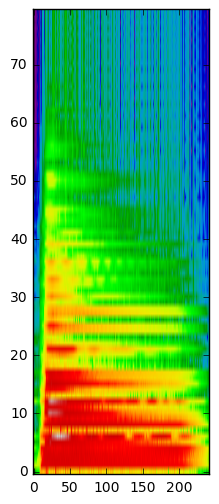

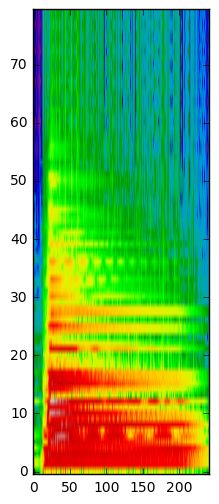

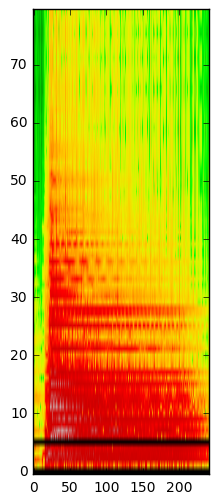

In [4]:
for spectrogram in sg:
    plt.figure(figsize=(12,6))
    plt.imshow(np.array(spectrogram).T, aspect=8, origin='lower', cmap=plt.cm.spectral)

In [5]:
fr_hz = onset_detector.feature_extractor.frame_rate_hz
sr = onset_detector.feature_extractor.sample_rate
subs = onset_detector.feature_extractor.subsampling_step
samples, _ = read_X(wavpath, fr_hz, sr, subs)
print(samples.shape)
samples = samples.ravel()
print(samples.shape)

(110250,)
(110250,)


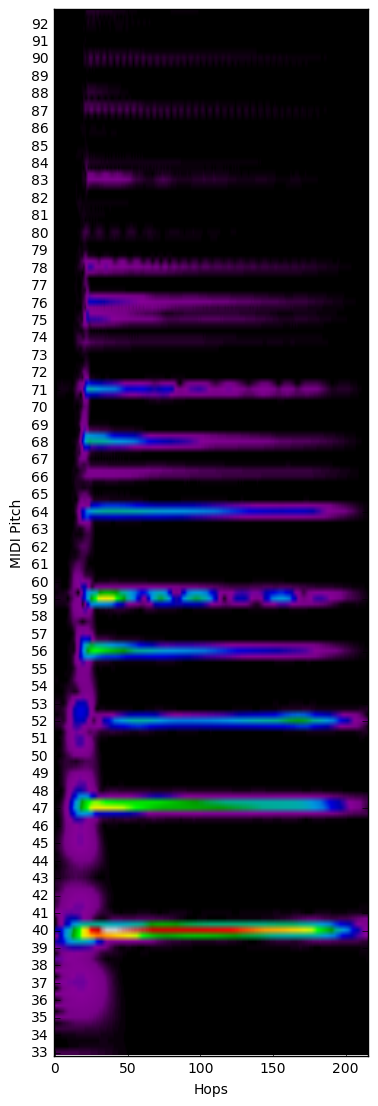

In [13]:
hopl = 512 # must be 2^n cannot be 441 (= subs)
n_bins=60
lowfreq = 55.0 # A1 (midi 33) # gtr E 82.4068892282

cqt_spect = cqt(samples, sr=sr, hop_length=hopl, fmin=lowfreq, n_bins=n_bins*3, bins_per_octave=36, scale=False)
cqt_spect = np.abs(cqt_spect)  # convert from complex to real (uses "norm")

plt.figure(figsize=(18,13.5))
plt.imshow(cqt_spect, aspect=4, origin='lower', cmap=plt.cm.spectral)
# plt.title('3 bins per note, aspect=8')
yt = np.arange(0, cqt_spect.shape[0], 3)
_ = plt.yticks(yt, (yt/3+33).astype('int')) # range starts at midi pitch 33
_ = plt.xlabel('Hops')
_ = plt.ylabel('MIDI Pitch')